In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import seaborn as sns
from mfa import MFA

# Constants

In [2]:
test_seq = 'ATGCGCGATCGATCGATCGCTAGACGTATCG'

In [3]:
list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
list[0:3]

['a', 'b', 'c']

# CGR MFA

## CGR Any size

In [4]:
m_cum = MFA.cgr('ATCG', m_size = 10 , cumulative=True)
m_cum

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [5]:
mask = m_cum != 0
non_zero = m_cum[mask]
non_zero

array([1, 1, 1, 1])

In [6]:
np.sum(m_cum)

4

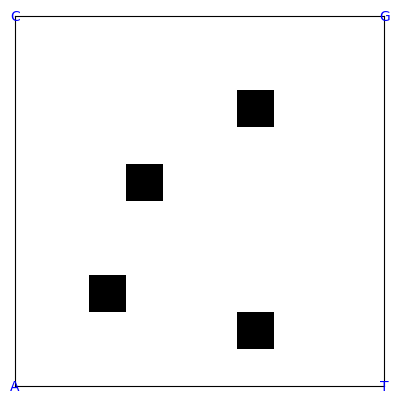

In [7]:
MFA.plot_cgr(m_cum)

In [8]:
m = MFA.cgr('ATCG', m_size = 10)
m

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False,  True, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False,  True, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False,  True, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False,  True, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

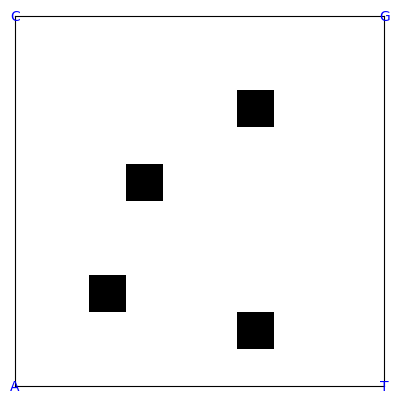

In [9]:
MFA.plot_cgr(m)

In [10]:
cgr_points = MFA.cgr_tuples('ATCG')
cgr_points

[(0.25, 0.25), (0.625, 0.125), (0.3125, 0.5625), (0.65625, 0.78125)]

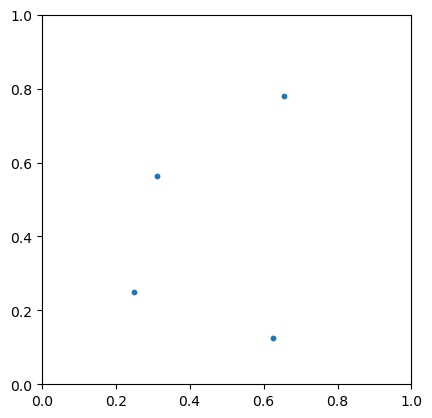

In [11]:
MFA.cgr_tuples_plot(cgr_points, 10)

In [12]:
cgr_points_1 = MFA.cgr_tuples(test_seq)
cgr_points_1

[(0.25, 0.25),
 (0.625, 0.125),
 (0.8125, 0.5625),
 (0.40625, 0.78125),
 (0.703125, 0.890625),
 (0.3515625, 0.9453125),
 (0.67578125, 0.97265625),
 (0.337890625, 0.486328125),
 (0.6689453125, 0.2431640625),
 (0.33447265625, 0.62158203125),
 (0.667236328125, 0.810791015625),
 (0.3336181640625, 0.4053955078125),
 (0.66680908203125, 0.20269775390625),
 (0.333404541015625, 0.601348876953125),
 (0.6667022705078125, 0.8006744384765625),
 (0.33335113525390625, 0.40033721923828125),
 (0.6666755676269531, 0.20016860961914062),
 (0.33333778381347656, 0.6000843048095703),
 (0.6666688919067383, 0.8000421524047852),
 (0.33333444595336914, 0.9000210762023926),
 (0.6666672229766846, 0.4500105381011963),
 (0.3333336114883423, 0.22500526905059814),
 (0.6666668057441711, 0.6125026345252991),
 (0.33333340287208557, 0.30625131726264954),
 (0.16666670143604279, 0.6531256586313248),
 (0.5833333507180214, 0.8265628293156624),
 (0.7916666753590107, 0.4132814146578312),
 (0.39583333767950535, 0.206640707328915

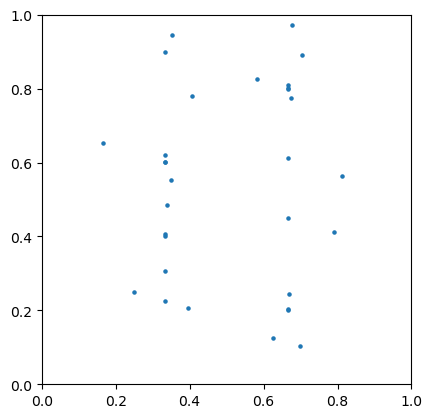

In [13]:
MFA.cgr_tuples_plot(cgr_points_1, 5)

In [14]:
cgr_points_matrix = MFA.cgr(test_seq, m_size=10)
cgr_points_matrix


array([[False, False, False,  True, False, False,  True, False, False,
        False],
       [False, False, False, False, False,  True,  True,  True, False,
        False],
       [False, False, False, False,  True, False,  True, False, False,
        False],
       [False,  True, False,  True, False, False,  True, False, False,
        False],
       [False, False, False,  True, False, False, False, False,  True,
        False],
       [False, False, False,  True, False, False,  True,  True, False,
        False],
       [False, False, False,  True, False, False, False, False, False,
        False],
       [False, False,  True,  True, False, False,  True, False, False,
        False],
       [False, False, False, False, False, False,  True, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

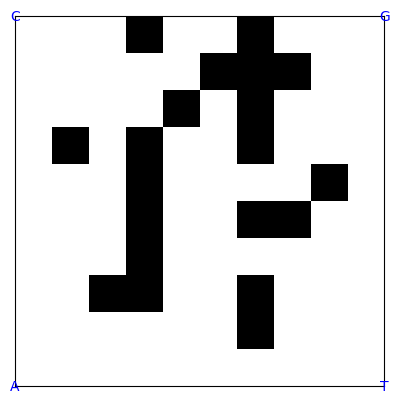

In [15]:
MFA.plot_cgr(cgr_points_matrix)

## CGR_powers

In [58]:
temp_ndarray = np.array([[0.7 * temp_var, temp_var] for temp_var in range(11)])
for idx_temp_var, temp_var in enumerate(temp_ndarray[:, 0]):
    print(f'{idx_temp_var} : {temp_var}')
print(temp_var)

0 : 0.0
1 : 0.7
2 : 1.4
3 : 2.0999999999999996
4 : 2.8
5 : 3.5
6 : 4.199999999999999
7 : 4.8999999999999995
8 : 5.6
9 : 6.3
10 : 7.0
7.0


In [16]:
m_usual = MFA.cgr(test_seq, m_size=8, cumulative=True)
m_usual

array([[0, 0, 2, 0, 0, 2, 0, 0],
       [0, 0, 0, 1, 1, 4, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 1, 1, 0],
       [0, 0, 3, 0, 0, 1, 1, 0],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0]])

In [22]:
m_powers = MFA.cgr_powers(test_seq, power = 3)
print(m_powers)
print(np.array_equal(m_powers, m_usual))

[[0 0 2 0 0 2 0 0]
 [0 0 0 1 1 4 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 4 0 0 1 1 0]
 [0 0 3 0 0 1 1 0]
 [0 0 2 0 0 0 0 0]
 [0 0 1 1 0 4 0 0]
 [0 0 0 0 0 1 0 0]]
True


In [18]:
next_power = MFA.cgr_next_power(m_powers)
next_power

array([[0, 3, 7, 0],
       [1, 4, 1, 1],
       [0, 5, 1, 1],
       [0, 2, 5, 0]])

In [19]:
next_power = MFA.cgr_next_power(next_power)
next_power

array([[8, 9],
       [7, 7]])

In [20]:
next_power = MFA.cgr_next_power(next_power)
next_power

array([[31]])

In [21]:
next_power = MFA.cgr_next_power(next_power)
next_power

Matrix size is already 1


## plot_tao_q()

In [ ]:
mfa_test = MFA(test_seq)

In [ ]:
epsilon_range = np.linspace(0, 0.1, 11)
q_range = np.linspace(-15, 15, 11)
print(epsilon_range)
print(q_range)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
[-15. -12.  -9.  -6.  -3.   0.   3.   6.   9.  12.  15.]


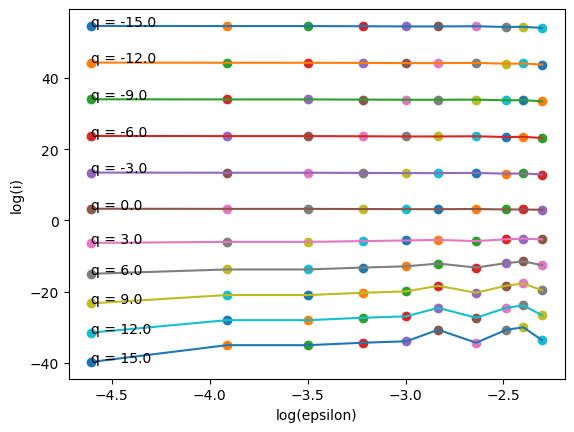

In [ ]:
tau_vals_test, r_squared_arr_test, i_list, epsilon_used = \
    mfa_test.calc_tau_q(epsilon_range, q_range, plot_log_i_log_e = True)

In [ ]:
tau_vals_test

array([-0.16812084, -0.16812421, -0.16814861, -0.16827164, -0.16716392,
       -0.10621294,  0.46639375,  1.24749702,  1.91600985,  2.56332915,
        3.20998286])

In [ ]:
r_squared_arr_test

array([0.53598448, 0.53603569, 0.53644544, 0.53971088, 0.56476875,
       0.70457804, 0.82595858, 0.80146949, 0.75722735, 0.72262877,
       0.69791509])

In [ ]:
print(i_list)
print(epsilon_used)

[[ 5.39703890e+23 -1.50000000e+01  1.00000000e-02]
 [ 1.81170132e+19 -1.20000000e+01  1.00000000e-02]
 [ 6.08317869e+14 -9.00000000e+00  1.00000000e-02]
 [ 2.04680536e+10 -6.00000000e+00  1.00000000e-02]
 [ 7.00088500e+05 -3.00000000e+00  1.00000000e-02]
 [ 2.70000000e+01  0.00000000e+00  1.00000000e-02]
 [ 1.84619516e-03  3.00000000e+00  1.00000000e-02]
 [ 3.14364893e-07  6.00000000e+00  1.00000000e-02]
 [ 7.83294098e-11  9.00000000e+00  1.00000000e-02]
 [ 2.08299800e-14  1.20000000e+01  1.00000000e-02]
 [ 5.58676907e-18  1.50000000e+01  1.00000000e-02]
 [ 5.16237914e+23 -1.50000000e+01  2.00000000e-02]
 [ 1.73291596e+19 -1.20000000e+01  2.00000000e-02]
 [ 5.81827950e+14 -9.00000000e+00  2.00000000e-02]
 [ 1.95679001e+10 -6.00000000e+00  2.00000000e-02]
 [ 6.67676995e+05 -3.00000000e+00  2.00000000e-02]
 [ 2.60000000e+01  0.00000000e+00  2.00000000e-02]
 [ 2.45040448e-03  3.00000000e+00  2.00000000e-02]
 [ 1.06253080e-06  6.00000000e+00  2.00000000e-02]
 [ 8.03377593e-10  9.00000000e+

## Caenorhabditis Elegans
Chromosome I

In [ ]:
from pathlib import Path

In [ ]:
PATH_DATA = Path.cwd().parent.parent / 'data'
PATH_DATA.exists()

True

In [ ]:
PATH_FRAGMENT = (PATH_DATA / 'temp' / 'genomes'
                 / 'c_elegans' / 'fragment_chr1.txt')
PATH_FRAGMENT.exists()

True

In [ ]:
with open(PATH_FRAGMENT, 'r') as f:
    seq_c_elegans = f.read()
len(seq_c_elegans)

506249

In [ ]:
seq_c_elegans = seq_c_elegans.replace('\n', '').upper()

In [ ]:
mfa_c_elegans = MFA(seq_c_elegans)

### GC Content

In [ ]:
mfa_c_elegans.gc_content()

0.36145

### MFA

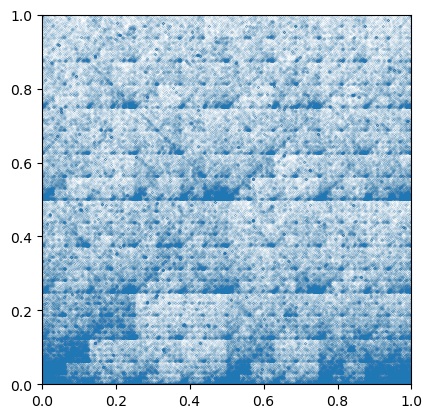

In [ ]:
MFA.cgr_tuples_plot(MFA.cgr_tuples(seq_c_elegans), 0.001)

In [ ]:
epsilon_range_c_elegans = np.linspace(0, 0.1, 11)
q_range_c_elegans = np.linspace(-20, 20, 41)
print(epsilon_range_c_elegans)
print(q_range_c_elegans)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
[-20. -19. -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.
  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.
   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.]


In [ ]:
# tau_vals_c_elegans, r_squared_arr_c_elegans, i_list_c_elegans, epsilon_used_c_elegans = \
#     mfa_c_elegans.calc_tau_q(epsilon_range_c_elegans, q_range_c_elegans, plot_log_i_log_e = True)

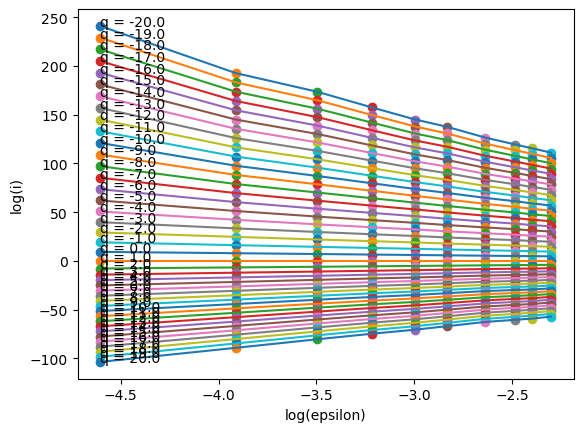

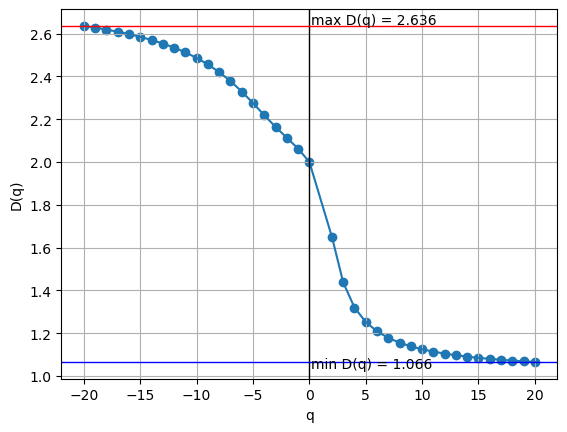

In [ ]:
D_q_vals_c_elegans, r_squared_vals_c_elegans = mfa_c_elegans.calc_Dq(
    epsilon_range_c_elegans, q_range_c_elegans, plot_log_i_log_e = True, 
    use_powers = False)

In [ ]:
D_q_vals_c_elegans

array([2.63635495, 2.62825967, 2.61925894, 2.60920101, 2.59790057,
       2.58512985, 2.57060733, 2.55398371, 2.53482514, 2.51259488,
       2.48663736, 2.45617422, 2.42033716, 2.37830149, 2.32967845,
       2.27539521, 2.2186826 , 2.16401015, 2.11319882, 2.0627367 ,
       2.        , 1.64988854, 1.43707772, 1.31971168, 1.25217141,
       1.20856107, 1.17809108, 1.15561994, 1.13838251, 1.12475688,
       1.1137276 , 1.10462574, 1.0969925 , 1.09050272, 1.08491967,
       1.08006706, 1.07581105, 1.07204829, 1.06869782, 1.06569535])

In [ ]:
r_squared_vals_c_elegans

array([0.99546378, 0.9954645 , 0.99546684, 0.99547143, 0.99547923,
       0.99549164, 0.99551087, 0.99554046, 0.99558624, 0.99565802,
       0.99577228, 0.99595588, 0.99624863, 0.99669779, 0.99732996,
       0.99809503, 0.99883757, 0.99939805, 0.99974551, 0.99993434,
       1.        , 0.03775631, 0.99972758, 0.99963097, 0.9993557 ,
       0.99917732, 0.99909186, 0.99905093, 0.99903066, 0.9990204 ,
       0.99901518, 0.99901258, 0.99901138, 0.99901093, 0.99901089,
       0.99901107, 0.99901136, 0.99901172, 0.99901211, 0.99901251,
       0.9990129 ])

In [ ]:
delta_Dq_c_elegans = np.max(D_q_vals_c_elegans) - np.min(D_q_vals_c_elegans)
delta_Dq_c_elegans

1.5706596018054872

## Human Globin

In [ ]:
PATH_H_GLOBIN = (PATH_DATA / 'temp' / 'genomes'
                 / 'human_globin' / 'human_globin.txt')
PATH_H_GLOBIN.exists() 

True

In [ ]:
with open(PATH_H_GLOBIN, 'r') as f:
    seq_h_globin = f.read()

In [ ]:
len(seq_h_globin.split('\n')[0])

51

In [ ]:
seq_h_globin = seq_h_globin[52:].replace('\n', '').upper()
seq_h_globin[:100]

'GAATTCTAATCTCCCTCTCAACCCTACAGTCACCCATTTGGTATATTAAAGATGTGTTGTCTACTGTCTAGTATCCCTCAAGTAGTGTCAGGAATTAGTC'

In [ ]:
len(seq_h_globin)

73308

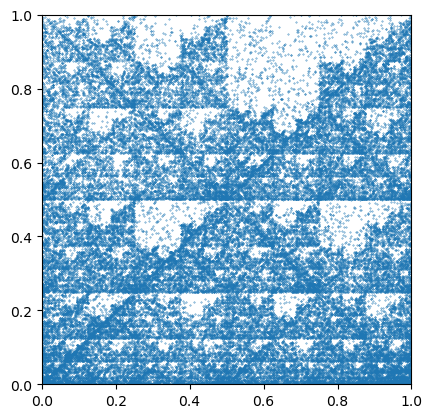

In [ ]:
MFA.cgr_tuples_plot(MFA.cgr_tuples(seq_h_globin), 0.1)

epsilon desde 1/4 hasta 1/512  
q en [-20, 20]  
https://www.nature.com/articles/20924  



### matrix cgr

2000128
[[ 0  0  0 ...  0  0  4]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]
 ...
 [ 5  7  9 ...  6  2  5]
 [ 9  6  5 ...  3  8  8]
 [45 12  6 ...  4  8 62]]


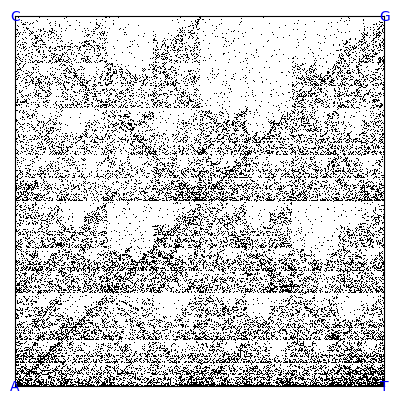

In [ ]:
matrix_h_globin_cum = MFA.cgr(seq_h_globin, m_size = 500, cumulative = True)
print(sys.getsizeof(matrix_h_globin_cum))
print(matrix_h_globin_cum)

MFA.plot_cgr(matrix_h_globin_cum)

In [ ]:
mfa_globin = MFA(seq_h_globin)

In [ ]:
epsilon_range_globin = np.linspace(0, 0.1, 15)
q_range_globin = np.linspace(-30, 30, 16)
print(epsilon_range_globin)
print(q_range_globin)

[0.         0.00714286 0.01428571 0.02142857 0.02857143 0.03571429
 0.04285714 0.05       0.05714286 0.06428571 0.07142857 0.07857143
 0.08571429 0.09285714 0.1       ]
[-30. -26. -22. -18. -14. -10.  -6.  -2.   2.   6.  10.  14.  18.  22.
  26.  30.]


In [ ]:
np.round(1 / epsilon_range_globin[1:])

array([140.,  70.,  47.,  35.,  28.,  23.,  20.,  18.,  16.,  14.,  13.,
        12.,  11.,  10.])

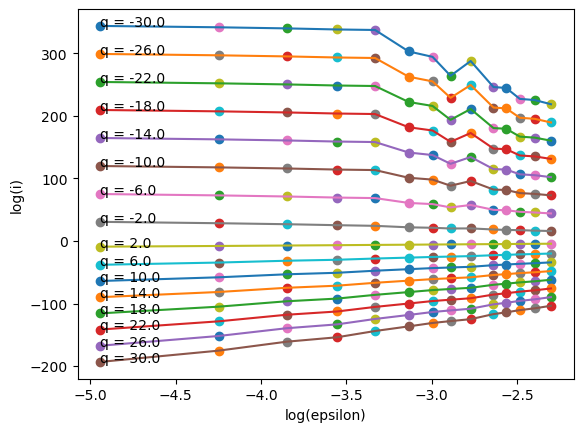

In [ ]:
tau_vals, r_squared_arr, i_list_globin, epsilon_used_globin = \
    mfa_globin.calc_tau_q(epsilon_range_globin, q_range_globin, plot_log_i_log_e = True)

In [ ]:
r_squared_arr

array([0.7641443 , 0.76872961, 0.77486044, 0.78347147, 0.79644332,
       0.81821168, 0.86206761, 0.96607806, 0.99923837, 0.99324675,
       0.99239007, 0.9923146 , 0.99228577, 0.99226503, 0.99224864,
       0.99223591])

In [ ]:
tau_vals

array([-55.16945626, -48.22439519, -41.27690883, -34.32504722,
       -27.36334093, -20.37415572, -13.29813815,  -5.96116487,
         1.81623251,   7.02177392,  11.58245502,  16.22292454,
        20.8813126 ,  25.54797276,  30.21993077,  34.89542967])

In [ ]:
# Define a threshold to avoid division by values too close to zero
threshold = 1e-6

# Find indices where q - 1 is not too close to zero
valid_indices = np.where(np.abs(q_range_globin - 1) > threshold)

# Extract the actual indices array from the tuple
valid_indices = valid_indices[0]

# Use valid_indices to index tau_vals and q_range_globin
D_q_vals = tau_vals[valid_indices] / (q_range_globin[valid_indices] - 1)
D_q_vals


array([1.77965988, 1.78608871, 1.79464821, 1.80658143, 1.82422273,
       1.85219597, 1.89973402, 1.98705496, 1.81623251, 1.40435478,
       1.28693945, 1.24791727, 1.22831251, 1.21657013, 1.20879723,
       1.20329068])

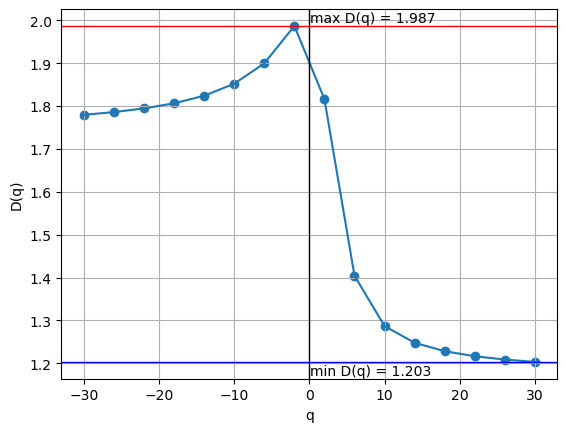

In [ ]:
D_q_vals, r_squared_vals = mfa_globin.calc_Dq(
    epsilon_range_globin, q_range_globin, plot_log_i_log_e = False,
    use_powers = False)

In [ ]:
D_q_vals

array([1.77965988, 1.78608871, 1.79464821, 1.80658143, 1.82422273,
       1.85219597, 1.89973402, 1.98705496, 1.81623251, 1.40435478,
       1.28693945, 1.24791727, 1.22831251, 1.21657013, 1.20879723,
       1.20329068])

In [ ]:
print(np.max(D_q_vals))
print(np.min(D_q_vals))
delta_Dq = np.max(D_q_vals) - np.min(D_q_vals)
print(delta_Dq)

1.9870549552858456
1.2032906783865844
0.7837642768992612
